## This document is to simulate only the geometry of the Elliptical Mirror Trap

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import time
from numba import njit,prange

In [5]:
@njit(boundscheck=True)
def trap(Vrf, Vdc):
    
    #Define the parameters that make up your trap
    eps = 0.97413; #roughly the eccentricity
    f = 1; #flattening
    a = 0.05; #semi-minor axis
    c = 0.226*a; #distance from center to pole, semi major #0.293 is the exact like his photo, but doesn't give as good of a trap
    Rmin = 0.0114; #radius of the waist of the ellipsoid
    m = 0.01; #additional mirror thickness horizontal
    #t =  0.03; # the very top of the mirror
    #s = -0.035; # the bottom of the grounded part/the top of the RF part
    #u = -0.046965; # where the top of the laser opening is
    #d = -0.048465; # where the bottom of the laser opening is
    #b = -0.0509; # The bottom of the mirror block
    t =  0.03; # the very top of the mirror
    s = -0.04987;#-0.025; # the bottom of the grounded part/the top of the RF part
    u = -0.046965; # where the top of the laser opening is
    d = -0.048465; # where the bottom of the laser opening is
    u0 = 0.5*(u + d); # The z point of the optical focus (0, 0 , u0)
    slope = 0.5; #slope of line of laser slits
    b = -0.0509; # The bottom of the mirror block
    Rhole = 0.0009; #radius of the hole
    RholeLaser = 0.001; # Radius of the laser hole
    Hneedle = 0.0009; #height of needle inside trap up until the beginning of the needle tip
    Rneedle = 0.00023; #radius of needle
    HneedleTip = 0.0024; # height of needle tip from needle body
    RneedleTip = 0.0001; # The ball on top of the needle
    Bneedle = b; #where the needle begins

     
    
    #Properties of our grid
    gmax = 0.055 #physical size of the space simulated (meters)
    points = 601 # number of points that are being simulated
    steps = points - 1 # just the number of points minus one
    x = np.linspace(-gmax/2, gmax/2, points) #chosing how much space in the x, y, z direction, where it begins and where it ends
    y = np.linspace(-gmax/2, gmax/2, points)
    z = np.linspace(-gmax, 3*gmax/4, points)
    size = len(x) # telling it how to organize these spaces
    sizeZ = len(z)
    xmid = int((size)/2)
    ymid = int((size)/2)
    zmid = int((sizeZ)/2) 
    lattice_points=np.zeros((size**3,3))
    marker=0 #What do these mean?
    
    V0 = np.zeros((size, size, size)) #initialize the matrix for electric potential
    V0dc= np.zeros((size, size, size))
    V0_temp=np.zeros((size, size, size))
    V0dc_temp=np.zeros((size, size, size))
    cords=np.zeros((size, size, size, 3))
    iterations = 600 #number of iterations
    CenterV = np.zeros((iterations,1)) #keep track of the potential value at the center at each iteration
    
    # Now define the boundry conditions
    for i in range(len(x)):
        for j in range(len(y)):
            for k in range(len(z)):
                cords[i, j, k] = [i, j, k]
                
                  #The ellipsoidal mirror part 1, the grounded portion at the top
                #if ((z[k] > (a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < t) and (z[k] > s)): #the top half of the ellipsoid
                #    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                #elif ((z[k] < -(a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < t) and (z[k] > s)): #the bottom half of the ellipsoid
                #    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                #elif ((y[j] > np.sqrt(Rmin**2 - x[i]**2)) and (y[j] < Rmin + m) and (z[k] < t) and (z[k] > s)): #other part of mirror going around the top of ellipsoid
                ##    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                #elif ((y[j] < -np.sqrt(Rmin**2 - x[i]**2)) and (y[j] > -Rmin - m) and (z[k] < t) and (z[k] > s)):#other part of mirror going around the bottom of ellipsoid
                #    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                #elif ((x[i] < Rmin + m) and (x[i] > Rmin) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < t ) and (z[k] > s)): # to make an even square around ellipsoid
                #    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                #elif ((x[i] < - Rmin) and (x[i] > -Rmin - m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < t) and (z[k] > s)): # to make an even square around ellipsoid
                #    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                    
                # Bottom of the ellipsoidal mirror
                #elif ((x[i] > np.sqrt(Rhole**2 - y[j]**2)) and (x[i] < Rmin + m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
                #    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                #elif ((x[i] < -np.sqrt(Rhole**2 - y[j]**2)) and (x[i] > -Rmin - m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
                #    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                #elif ((x[i] > -Rmin - m) and (y[j] < -Rhole) and (x[i] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
                #    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                ##elif ((x[i] < Rmin + m) and (y[j] > Rhole) and (y[j] < Rmin + m) and (x[i] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
                #    V0[i, j, k] = Vrf[0]
                #    V0dc[i, j, k] = Vdc[0]
                    
                # The RF cylinder
                #elif ((x[i] < np.sqrt(RFOuterR**2 - y[j]**2)) and (x[i] > np.sqrt(RFInnerR**2 - y[j]**2)) and (z[k] > -RFHeight + s) and (z[k] < RFHeight + s)):
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((x[i] > -np.sqrt(RFOuterR**2 - y[j]**2)) and (x[i] < -np.sqrt(RFInnerR**2 - y[j]**2)) and (z[k] > -RFHeight + s) and (z[k] < RFHeight + s)):
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((y[j] > -np.sqrt(RFOuterR**2 - x[i]**2)) and (y[j] < -np.sqrt(RFInnerR**2 - x[i]**2)) and (z[k] > -RFHeight + s) and (z[k] < RFHeight + s)):
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((y[j] < np.sqrt(RFOuterR**2 - x[i]**2)) and (y[j] > np.sqrt(RFInnerR**2 - x[i]**2)) and (z[k] > -RFHeight + s) and (z[k] < RFHeight + s)):
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                    
                     # The Grounded cylinder
                #elif ((x[i] < np.sqrt(COuterR**2 - y[j]**2)) and (x[i] > np.sqrt(CInnerR**2 - y[j]**2)) and (z[k] > -CHeight + s) and (z[k] < CHeight + s)):
                #    V0[i, j, k] = Vrf[2]
                #    V0dc[i, j, k] = Vdc[2]
                #elif ((x[i] > -np.sqrt(COuterR**2 - y[j]**2)) and (x[i] < -np.sqrt(CInnerR**2 - y[j]**2)) and (z[k] > -CHeight + s) and (z[k] < CHeight + s)):
                #    V0[i, j, k] = Vrf[2]
                #    V0dc[i, j, k] = Vdc[2]
                #elif ((y[j] > -np.sqrt(COuterR**2 - x[i]**2)) and (y[j] < -np.sqrt(CInnerR**2 - x[i]**2)) and (z[k] > -CHeight + s) and (z[k] < CHeight + s)):
                #    V0[i, j, k] = Vrf[2]
                #    V0dc[i, j, k] = Vdc[2]
                #elif ((y[j] < np.sqrt(COuterR**2 - x[i]**2)) and (y[j] > np.sqrt(CInnerR**2 - x[i]**2)) and (z[k] > -CHeight + s) and (z[k] < CHeight + s)):
                #    V0[i, j, k] = Vrf[2]
                #    V0dc[i, j, k] = Vdc[2]
                    
                    #The ellipsoidal mirror part 2, the top portion of the RF part
                #elif ((z[k] > (a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < s) and (z[k] > u)): #the top half of the ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((z[k] < -(a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < s) and (z[k] > u)): #the bottom half of the ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((y[j] > np.sqrt(Rmin**2 - x[i]**2)) and (y[j] < Rmin + m) and (z[k] < s) and (z[k] > u)): #other part of mirror going around the top of ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((y[j] < -np.sqrt(Rmin**2 - x[i]**2)) and (y[j] > -Rmin - m) and (z[k] < s) and (z[k] > u)):#other part of mirror going around the bottom of ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((x[i] < Rmin + m) and (x[i] > Rmin) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < s) and (z[k] > u)): # to make an even square around ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((x[i] < - Rmin) and (x[i] > -Rmin - m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < s) and (z[k] > u)): # to make an even square around ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                    
                    
                    #The ellipsoidal mirror part 3
                #elif ((z[k] > (a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < d) and (z[k] > b)): #the top half of the ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((z[k] < -(a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < d) and (z[k] > b)): #the bottom half of the ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((y[j] > np.sqrt(Rmin**2 - x[i]**2)) and (y[j] < Rmin + m) and (z[k] < d) and (z[k] > b)): #other part of mirror going around the top of ellipsoid
                #    V0[i, j, k] = Vrf[1]
                ##    V0dc[i, j, k] = Vdc[1]
                #elif ((y[j] < -np.sqrt(Rmin**2 - x[i]**2)) and (y[j] > -Rmin - m) and (z[k] < d) and (z[k] > b)):#other part of mirror going around the bottom of ellipsoid
                #    V0[i, j, k] = Vrf[1]
                ##    V0dc[i, j, k] = Vdc[1]
                #elif ((x[i] < Rmin + m) and (x[i] > Rmin) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < d) and (z[k] > b)): # to make an even square around ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                #elif ((x[i] < - Rmin) and (x[i] > -Rmin - m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < d) and (z[k] > b)): # to make an even square around ellipsoid
                #    V0[i, j, k] = Vrf[1]
                #    V0dc[i, j, k] = Vdc[1]
                    
                #The hole for laser access
                #elif ((z[k] < u) and (z[k] > d) and (z[k] > np.sqrt(Rhole**2 - y[j]**2) + .5*(u+d)) and (z[k] > (a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2))):
                #    V0[i, j, k] = Vrf[2]
                #    V0dc[i, j, k] = Vdc[2]
                #elif ((z[k] < u) and (z[k] > d) and (z[k] < -np.sqrt(Rhole**2 - y[j]**2) + .5*(u+d)) and (z[k] < -(a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2))):
                #    V0[i, j, k] = Vrf[2]
                #    V0dc[i, j, k] = Vdc[2]
                    
                #The ellipsoidal mirror part 1, the laser slit and up
                if ((z[k] > (a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < t) and (z[k] > slope*x[i] + u) and (z[k] > s)): #the top half of the ellipsoid
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                elif ((z[k] < -(a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < t) and (z[k] > slope*x[i] + u) and (z[k] > s)): #the bottom half of the ellipsoid
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                elif ((y[j] > np.sqrt(Rmin**2 - x[i]**2)) and (y[j] < Rmin + m) and (z[k] < t) and (z[k] > slope*x[i] + u) and (z[k] > s)): #other part of mirror going around the top of ellipsoid
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                elif ((y[j] < -np.sqrt(Rmin**2 - x[i]**2)) and (y[j] > -Rmin - m) and (z[k] < t) and (z[k] > slope*x[i] + u) and (z[k] > s)):#other part of mirror going around the bottom of ellipsoid
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                elif ((x[i] < Rmin + m) and (x[i] > Rmin) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < t ) and (z[k] > slope*x[i] + u) and (z[k] > s)): # to make an even square around ellipsoid
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                elif ((x[i] < - Rmin) and (x[i] > -Rmin - m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < t) and (z[k] > slope*x[i] + u) and (z[k] > s)): # to make an even square around ellipsoid
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                    
                #The ellipsoidal mirror part 2, the laser slit and down
                elif ((z[k] > (a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < slope*x[i] + d) and (z[k] > s) and (z[k] < t)): #the top half of the ellipsoid
                    V0[i, j, k] = Vrf[1]
                    V0dc[i, j, k] = Vdc[1]
                elif ((z[k] < -(a/c)* np.sqrt(c**2 - x[i]**2 -y[j]**2)) and (z[k] < slope*x[i] + d) and (z[k] > s) and (z[k] < t)): #the bottom half of the ellipsoid
                    V0[i, j, k] = Vrf[1]
                    V0dc[i, j, k] = Vdc[1]
                elif ((y[j] > np.sqrt(Rmin**2 - x[i]**2)) and (y[j] < Rmin + m) and (z[k] < slope*x[i] + d) and (z[k] > s) and (z[k] < t)): #other part of mirror going around the top of ellipsoid
                    V0[i, j, k] = Vrf[1]
                    V0dc[i, j, k] = Vdc[1]
                elif ((y[j] < -np.sqrt(Rmin**2 - x[i]**2)) and (y[j] > -Rmin - m) and (z[k] < slope*x[i] + d) and (z[k] > s) and (z[k] < t)):#other part of mirror going around the bottom of ellipsoid
                    V0[i, j, k] = Vrf[1]
                    V0dc[i, j, k] = Vdc[1]
                elif ((x[i] < Rmin + m) and (x[i] > Rmin) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < slope*x[i] + d) and (z[k] > s) and (z[k] < t)): # to make an even square around ellipsoid
                    V0[i, j, k] = Vrf[1]
                    V0dc[i, j, k] = Vdc[1]
                elif ((x[i] < - Rmin) and (x[i] > -Rmin - m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] < slope*x[i] + d) and (z[k] > s) and (z[k] < t)): # to make an even square around ellipsoid
                    V0[i, j, k] = Vrf[1]
                    V0dc[i, j, k] = Vdc[1]
                    
                # Bottom of the ellipsoidal mirror part 1, the laser slit and up
                elif ((x[i] > np.sqrt(Rhole**2 - y[j]**2)) and (x[i] < Rmin + m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                elif ((x[i] < -np.sqrt(Rhole**2 - y[j]**2)) and (x[i] > -Rmin - m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] <= s) and (z[k] > b)): # and (z[k] > slope*x[i] + u)):
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                elif ((x[i] > -Rmin - m) and (y[j] < -Rhole) and (x[i] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                elif ((x[i] < Rmin + m) and (y[j] > Rhole) and (y[j] < Rmin + m) and (x[i] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
                    V0[i, j, k] = Vrf[0]
                    V0dc[i, j, k] = Vdc[0]
                    
                # Bottom of the ellipsoidal mirror part 2, the laser slit and down
               # elif ((x[i] > np.sqrt(Rhole**2 - y[j]**2)) and (x[i] < Rmin + m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
               #     V0[i, j, k] = Vrf[1]
               #     V0dc[i, j, k] = Vdc[1]
               # elif ((x[i] < -np.sqrt(Rhole**2 - y[j]**2)) and (x[i] > -Rmin - m) and (y[j] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):# and (z[k] < slope*x[i] + d)):
               #     V0[i, j, k] = Vrf[1]
               #     V0dc[i, j, k] = Vdc[1]
               # elif ((x[i] > -Rmin - m) and (y[j] < -Rhole) and (x[i] < Rmin + m) and (y[j] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
               #     V0[i, j, k] = Vrf[1]
               #     V0dc[i, j, k] = Vdc[1]
               # elif ((x[i] < Rmin + m) and (y[j] > Rhole) and (y[j] < Rmin + m) and (x[i] > -Rmin - m) and (z[k] <= s) and (z[k] > b)):
               #     V0[i, j, k] = Vrf[1]
               #     V0dc[i, j, k] = Vdc[1]
                    
                #The needle
                elif ((y[j] < np.sqrt(Rneedle - x[i]**2)) and (x[i] < Rneedle) and (x[i] > -Rneedle) and (y[j] > -np.sqrt(Rneedle - x[i]**2)) and (y[j] < Rneedle) and (y[j] > -Rneedle) and (z[k] > -Bneedle) and (z[k] < -Bneedle + Hneedle)):
                    V0[i, j, k] = Vrf[2]
                    V0dc[i, j, k] = Vdc[2]
                #The needle tip
                elif ((z[k] < - np.sqrt(x[i]**2 + y[j]**2)*12.5) and (x[i] < Rneedle) and (x[i] > -Rneedle) and (y[j] > -Rneedle) and (y[j] < Rneedle) and (z[k] > -Bneedle + Hneedle) and (z[k] < -Bneedle + Hneedle + HneedleTip)):
                    V0[i, j, k] = Vrf[2]
                    V0dc[i, j, k] = Vdc[2]
                #the very tip of the needle (to avoid fringing effects)
                elif ((z[k] > -Bneedle + Hneedle + HneedleTip - 0.0002) and (z[k] < -Bneedle + Hneedle + HneedleTip + 0.0002) and (z[k] < np.sqrt(RneedleTip**2 - x[i]**2 - y[j]**2))):
                    V0[i, j, k] = Vrf[2]
                    V0dc[i, j, k] = Vdc[2]
                


                else:
                    V0[i, j, k] = 0
                    V0dc[i, j, k] = 0
                    lattice_points[marker]=[i,j,k]
                    marker+=1
                    
                    
    lattice_points=lattice_points[0:marker] # what does this mean?    
    
    V0_temp=V0    
    V0dc_temp=V0dc
    
    return V0,V0dc,CenterV,lattice_points,cords

In [6]:
#Voltages used in the simulation
RF=np.array([1, 2, 3]) #corresponding to each portion of the mirror geometry
DC=np.array([1, 2, 3])

start=time.time() # Records the time started.

A=trap(RF,DC) # Runs the simulation

print("The time elapsed is ",time.time()-start, "seconds")

The time elapsed is  191.45831179618835 seconds


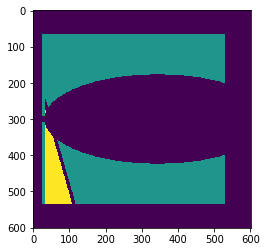

In [8]:
#Plotting the resulting geometry

plt.imshow(A[0][:,300,:], cmap=plt.cm.get_cmap('viridis', 20)) #plotting the x-z axis cross section for the RF
#plt.axis([1,150, 250,350])